In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
test_load = os.listdir("/content/test/")
train_load = os.listdir("/content/train")

x_test =[]
x_train = []

for image in test_load:
  # img = cv2.imread("/content/test/"+image, cv2.IMREAD_GRAYSCALE)
  img = cv2.imread("/content/test/"+image)
  if img is not None:
    img = cv2.resize(img, [300,300], interpolation = cv2.INTER_AREA)
    x_test.append(img)

for image in train_load:
  # img = cv2.imread("/content/train/"+image, cv2.IMREAD_GRAYSCALE)
  img = cv2.imread("/content/train/"+image)

  if img is not None:
    img = cv2.resize(img, [300,300], interpolation = cv2.INTER_AREA)
    x_train.append(img)

In [ ]:
x_test = np.array(x_test)
x_train = np.array(x_train)
print(x_test.shape, x_train.shape)

(200, 300, 300, 3) (200, 300, 300, 3)


In [ ]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

print(np.min(x_train_noisy), np.max(x_train_noisy))

print(x_train_noisy.shape, x_train_noisy.shape)

-0.5093074842757264 258.4111814889378
(200, 300, 300) (200, 300, 300)


# MAIN

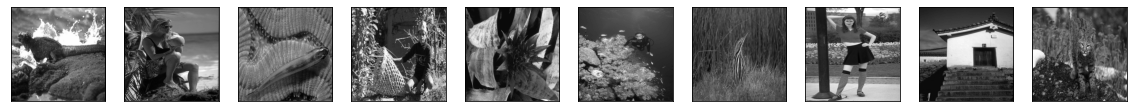

In [ ]:

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(320, 320))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:

input_img = tf.keras.Input(shape=(320, 320, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder1 = tf.keras.Model(input_img, decoded)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
autoencoder1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=1, write_graph=True)])

Epoch 1/10
2/2 [==============================] - 2s 1s/step - loss: -1004.6803 - val_loss: -1615.8856
Epoch 2/10
2/2 [==============================] - 1s 709ms/step - loss: -1646.0613 - val_loss: -1633.5735
Epoch 3/10
2/2 [==============================] - 1s 707ms/step - loss: -1659.4163 - val_loss: -1636.9176
Epoch 4/10
2/2 [==============================] - 2s 999ms/step - loss: -1662.4369 - val_loss: -1637.6965
Epoch 5/10
2/2 [==============================] - 1s 715ms/step - loss: -1663.4114 - val_loss: -1637.9520
Epoch 6/10
2/2 [==============================] - 2s 1s/step - loss: -1663.6942 - val_loss: -1638.0184
Epoch 7/10
2/2 [==============================] - 1s 717ms/step - loss: -1663.7976 - val_loss: -1638.0389
Epoch 8/10
2/2 [==============================] - 1s 710ms/step - loss: -1663.8313 - val_loss: -1638.0479
Epoch 9/10
2/2 [==============================] - 1s 719ms/step - loss: -1663.8497 - val_loss: -1638.0525
Epoch 10/10
2/2 [==============================] - 2

7/7 [==============================] - 0s 57ms/step


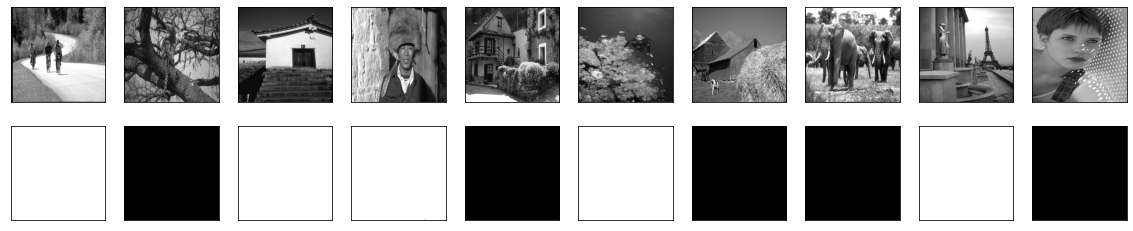

In [ ]:
predictions = autoencoder1.predict(x_test)
display(x_test, predictions)

In [ ]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(320, 320))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(320, 320))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Test

In [ ]:
# adds the Gaussian noise based on the mean and the standard deviation
def add_gaussian_noise(data):
    mean = (10, 10, 10)
    std = (50, 50, 50)
    row, col, channel = data.shape
    noise = np.random.normal(mean, std, (row, col,     channel)).astype('uint8')
    return data + noise
    
def add_gaussian_to_dataset(data):
    count = 0
    end = len(data)
    output_data = []
    while count < end:
        output_data.append(add_gaussian_noise(data[count]))
        count+=1
    return np.array(output_data)

In [ ]:
gaussian_train_data = add_gaussian_to_dataset(x_train)
gaussian_test_data = add_gaussian_to_dataset(x_test)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
import os

In [ ]:
def PSNR(gt, image, max_value=1):
    """"Function to calculate peak signal-to-noise ratio (PSNR) between two images."""
    height, width , channels= gt.shape
    # gt=cv2.resize(gt, (width//40*40,height//40*40), interpolation=cv2.INTER_CUBIC)
    # print(gt.shape, image.shape)
    mse = np.mean((gt - image) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

In [ ]:
def get_patches(image):
    '''This functions creates and return patches of given image with a specified patch_size'''
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    height, width , channels= image.shape
    crop_sizes=[1]
    patch_size=40
    patches = []
    for crop_size in crop_sizes: #We will crop the image to different sizes
        crop_h, crop_w = int(height*crop_size),int(width*crop_size)
        image_scaled = cv2.resize(image, (crop_w,crop_h), interpolation=cv2.INTER_CUBIC)
        for i in range(0, crop_h-patch_size+1, int(patch_size/1)):
            for j in range(0, crop_w-patch_size+1, int(patch_size/1)):
              x = image_scaled[i:i+patch_size, j:j+patch_size] # This gets the patch from the original image with size patch_size x patch_size
              patches.append(x)
    return patches



def create_image_from_patches(patches,image_shape):
  '''This function takes the patches of images and reconstructs the image'''
  image=np.zeros(image_shape) # Create a image with all zeros with desired image shape
  patch_size=patches.shape[1]
  p=0
  for i in range(0,image.shape[0]-patch_size+1,int(patch_size/1)):
    for j in range(0,image.shape[1]-patch_size+1,int(patch_size/1)):
      image[i:i+patch_size,j:j+patch_size]=patches[p] # Assigning values of pixels from patches to image
      p+=1
  return np.array(image)
  
def get_image(gt,noise_level):
  '''This function takes a image and adds noise with specified level and return  noisy image and its patches'''
  patches=get_patches(gt)
  height, width , channels= gt.shape
  test_image=cv2.resize(gt, (width//40*40,height//40*40), interpolation=cv2.INTER_CUBIC)
  patches=np.array(patches)
  ground_truth=create_image_from_patches(patches,test_image.shape)

  #predicting the output on the patches of test image
  patches = patches.astype('float32') / 255.
  patches_noisy = patches+ tf.random.normal(shape=patches.shape,mean=0,stddev=noise_level/255) 
  patches_noisy = tf.clip_by_value(patches_noisy, clip_value_min=0., clip_value_max=1.)
  noisy_image=create_image_from_patches(patches_noisy,test_image.shape)
  
  return ground_truth/255.,noisy_image,patches_noisy

In [ ]:
idxs = np.random.randint(0, 200, 10)
img_list = x_train[idxs] 

In [ ]:
img_list[0].shape

(300, 300, 3)

In [ ]:
noisy_data = []
train_data = []
for img in x_train:
  gt, noisy, patches_noisy = get_image(img, 50)
  noisy_data.append(noisy)
  train_data.append(gt)

In [ ]:
noisy_data = np.array(noisy_data)
train_data = np.array(train_data)

In [ ]:
idxs = np.random.randint(0, 200, 10)
for img in zip(train_data[idxs], noisy_data[idxs]):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
  plt.title(f'PSNR of Image: {PSNR(img[0],img[1])}')
  ax1.imshow(img[0])
  ax2.imshow(img[1])
  plt.show()

In [ ]:
def create_model():
  x = keras.Input(shape=(280, 280, 3))
# Encoder
  e_conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  pool1 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(e_conv1)
  batchnorm_1 = tf.keras.layers.BatchNormalization()(pool1)
  e_conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(batchnorm_1)
  pool2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(e_conv2)
  batchnorm_2 = tf.keras.layers.BatchNormalization()(pool2)
  e_conv3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(batchnorm_2)
  h = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(e_conv3)
# Decoder
  d_conv1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(h)
  up1 = tf.keras.layers.UpSampling2D((2, 2))(d_conv1)
  d_conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
  up2 = tf.keras.layers.UpSampling2D((2, 2))(d_conv2)
  d_conv3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
  up3 = tf.keras.layers.UpSampling2D((2, 2))(d_conv3)
  r = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3)
  model = keras.Model(x, r)
  model.compile(optimizer='adam', loss='mse')
  return model


In [ ]:
auto_encoder = create_model()
auto_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 140, 140, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 140, 140, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 70, 32)       0     

In [ ]:
# gaussian_early_stop = EarlyStopping(monitor='loss', patience=3)
gaussian_history = auto_encoder.fit(noisy_data, train_data, epochs=500, batch_size=32, callbacks=[])

In [35]:
noisy_test_data = []
test_data = []
for img in x_test:
  gt, noisy, patches_noisy = get_image(img, 50)
  noisy_test_data.append(noisy)
  test_data.append(gt)

In [36]:
noisy_test_data = np.array(noisy_test_data)
test_data = np.array(test_data)

In [37]:
predicted = auto_encoder(test_data)
predicted = predicted.numpy()

In [ ]:
idxs = np.random.randint(0, 200, 10)
for img in zip(test_data[idxs], noisy_test_data[idxs], predicted[idxs]):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
  plt.title(f'PSNR of Original and Noisy: {PSNR(img[0],img[1])}, PSNR of Original and Denoised; {PSNR(img[0],img[2])}, PSNR of Noised and Denoised: {PSNR(img[1],img[2])}')
  ax1.imshow(img[0])
  ax2.imshow(img[1])
  ax3.imshow(img[2])
  plt.show()

In [ ]:
predicted_t = auto_encoder(train_data)
predicted_t = predicted_t.numpy()

In [ ]:
idxs = np.random.randint(0, 200, 10)
for img in zip(train_data[idxs], noisy_data[idxs], predicted_t[idxs]):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,12))
  plt.title(f'PSNR of Original and Noisy: {PSNR(img[0],img[1])}, PSNR of Original and Denoised; {PSNR(img[0],img[2])}, PSNR of Noised and Denoised: {PSNR(img[1],img[2])}')
  ax1.imshow(img[0])
  ax2.imshow(img[1])
  ax3.imshow(img[2])
  plt.show()